In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import seaborn as sns
#Two new packages!


In [2]:
filename = "LA_AQS_2023.csv"

In [3]:
df = pd.read_csv(filename)

In [4]:
df.head()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
0,6,37,1103,68103,1,34.06659,-118.22688,WGS84,Ambient Min Temperature,24 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
1,6,37,1103,42602,3,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,16,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
2,6,37,1103,62201,1,34.06659,-118.22688,WGS84,Relative Humidity,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
3,6,37,1103,62101,1,34.06659,-118.22688,WGS84,Outdoor Temperature,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
4,6,37,1103,42603,1,34.06659,-118.22688,WGS84,Oxides of nitrogen (NOx),1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


In [5]:
df['Parameter Name']

0           Ambient Min Temperature
1            Nitrogen dioxide (NO2)
2                 Relative Humidity
3               Outdoor Temperature
4          Oxides of nitrogen (NOx)
                    ...            
22155               Solar radiation
22156    Wind Direction - Resultant
22157        Wind Speed - Resultant
22158             Relative Humidity
22159           Outdoor Temperature
Name: Parameter Name, Length: 22160, dtype: object

In [6]:
df_O3 = df[(df["Parameter Name"]=="Ozone") & (df['Duration Description']=="1 HOUR")]
df_O3.head()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
20,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
64,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
204,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
228,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
271,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


In [7]:
# Let's make sure 'date' is actually a date in pandas
df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"])
df_O3['Date (Local)']

/var/folders/tj/h7yymnk16p1dd895mpk4pc080000gn/T/ipykernel_10532/3924966770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"])


20      2023-01-01
64      2023-01-02
204     2023-01-03
228     2023-01-04
271     2023-01-05
           ...    
21122   2023-09-26
21168   2023-09-27
21218   2023-09-28
21261   2023-09-29
21305   2023-09-30
Name: Date (Local), Length: 273, dtype: datetime64[ns]

<Axes: xlabel='Arithmetic Mean', ylabel='Count'>

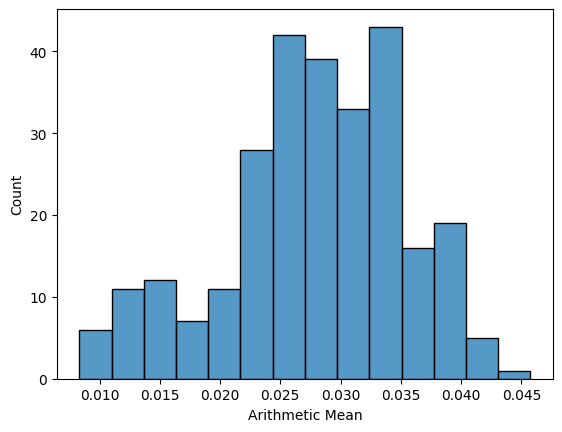

In [8]:
# Make histograms in Seaborn
# y data histogram

sns.histplot(data=df_O3, x="Arithmetic Mean")

In [9]:
df_NO2 = df[(df["Parameter Name"]=="Nitrogen dioxide (NO2)") & (df['Duration Description']=="1 HOUR")]
df_NO2.head()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
1,6,37,1103,42602,3,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,16,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
19,6,37,1103,42602,1,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,17,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
29,6,37,1103,42602,1,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,17,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
41,6,37,1103,42602,3,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,16,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
44,6,37,1103,42602,3,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,20,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


In [10]:
df_NO2["Date (Local)"] = pd.to_datetime(df_NO2["Date (Local)"])
df_NO2['Date (Local)']

/var/folders/tj/h7yymnk16p1dd895mpk4pc080000gn/T/ipykernel_10532/2253962085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NO2["Date (Local)"] = pd.to_datetime(df_NO2["Date (Local)"])


1       2023-01-01
19      2023-01-01
29      2023-01-01
41      2023-01-01
44      2023-01-02
           ...    
21264   2023-09-29
21297   2023-09-30
21298   2023-09-30
21307   2023-09-30
21308   2023-09-30
Name: Date (Local), Length: 1092, dtype: datetime64[ns]

<Axes: xlabel='Arithmetic Mean', ylabel='Density'>

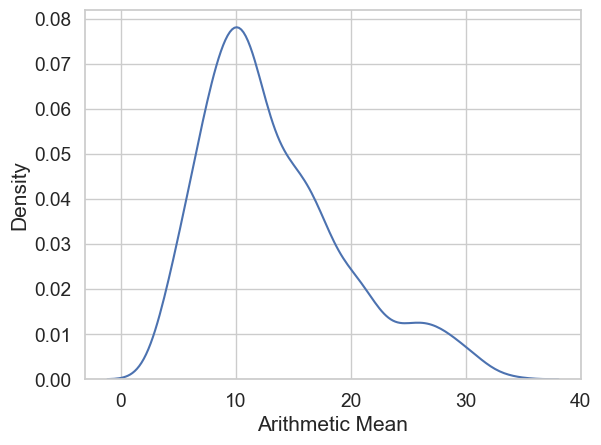

In [11]:
# Make density plots in Seaborn. Use "kdeplot" function. kde = Kernel Density Estimation
# y data histogram
sns.set_theme(style = 'whitegrid', font_scale=1.25)
sns.kdeplot(data=df_NO2, x="Arithmetic Mean")

In [12]:
df_1 = pd.DataFrame(data = {"NO2" : df_NO2["Arithmetic Mean"], 'Date' : df_NO2['Date (Local)']})
df_2 = pd.DataFrame(data = {"O3" : df_O3["Arithmetic Mean"], 'Date' : df_O3['Date (Local)']})
df_all = df_1.merge(df_2, on=['Date'])

In [13]:
df_all

,NO2,Date,O3
0,4.816667,2023-01-01,0.031708
1,4.550000,2023-01-01,0.031708
2,4.550000,2023-01-01,0.031708
3,4.816667,2023-01-01,0.031708
4,14.720833,2023-01-02,0.015792
...,...,...,...
1087,8.614286,2023-09-29,0.039048
1088,6.370833,2023-09-30,0.030042
1089,6.370833,2023-09-30,0.030042
1090,7.362500,2023-09-30,0.030042


<Axes: xlabel='O3', ylabel='NO2'>

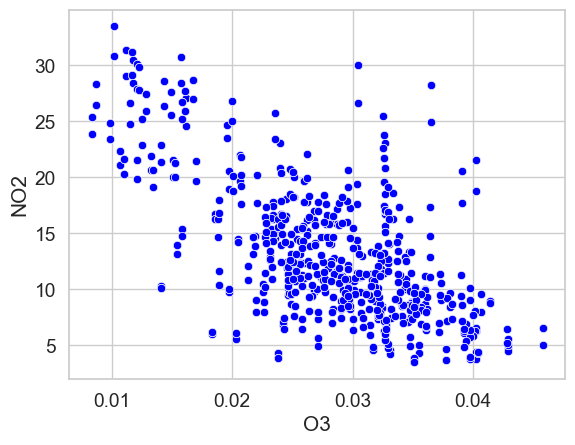

In [14]:
# Make plot of x vs y
# In seaborn, you're looking for a "scatterplot"
# Let's also change the color
sns.set_theme(style = 'whitegrid', font_scale=1.25)
sns.scatterplot(data=df_all, x="O3", y="NO2", color='blue')

In [15]:
df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"])
df_O3['Date (Local)']=df_O3['Date (Local)'].dt.month_name()


/var/folders/tj/h7yymnk16p1dd895mpk4pc080000gn/T/ipykernel_10532/3545615101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"])
/var/folders/tj/h7yymnk16p1dd895mpk4pc080000gn/T/ipykernel_10532/3545615101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_O3['Date (Local)']=df_O3['Date (Local)'].dt.month_name()


In [16]:
df_O3['Date (Local)']

20         January
64         January
204        January
228        January
271        January
           ...    
21122    September
21168    September
21218    September
21261    September
21305    September
Name: Date (Local), Length: 273, dtype: object

In [17]:
df_O3_jan = df_O3[(df_O3["Arithmetic Mean"] >0.035) & (df_O3['Date (Local)']=="January")]
df_O3_feb = df_O3[(df_O3["Arithmetic Mean"] >0.035) & (df_O3['Date (Local)']=="February")]
df_O3_mar = df_O3[(df_O3["Arithmetic Mean"] >0.035) & (df_O3['Date (Local)']=="March")]
df_O3_apr = df_O3[(df_O3["Arithmetic Mean"] >0.035) & (df_O3['Date (Local)']=="April")]
df_O3_may = df_O3[(df_O3["Arithmetic Mean"] >0.035) & (df_O3['Date (Local)']=="May")]
df_O3_jun = df_O3[(df_O3["Arithmetic Mean"] >0.035) & (df_O3['Date (Local)']=="June")]
df_O3_jul = df_O3[(df_O3["Arithmetic Mean"] >0.035) & (df_O3['Date (Local)']=="July")]
df_O3_aug = df_O3[(df_O3["Arithmetic Mean"] >0.035) & (df_O3['Date (Local)']=="August")]
df_O3_sep = df_O3[(df_O3["Arithmetic Mean"] >0.035) & (df_O3['Date (Local)']=="September")]
df_O3_oct = df_O3[(df_O3["Arithmetic Mean"] >0.035) & (df_O3['Date (Local)']=="October")]
df_O3_nov = df_O3[(df_O3["Arithmetic Mean"] >0.035) & (df_O3['Date (Local)']=="November")]
df_O3_dec = df_O3[(df_O3["Arithmetic Mean"] >0.035) & (df_O3['Date (Local)']=="December")]


In [18]:
frames = [df_O3_jan,df_O3_feb,df_O3_mar,df_O3_apr,df_O3_may,df_O3_jun,df_O3_jul,df_O3_aug,df_O3_sep,df_O3_oct,df_O3_nov,df_O3_dec]
result = pd.concat(frames)


<Axes: xlabel='Arithmetic Mean', ylabel='Date (Local)'>

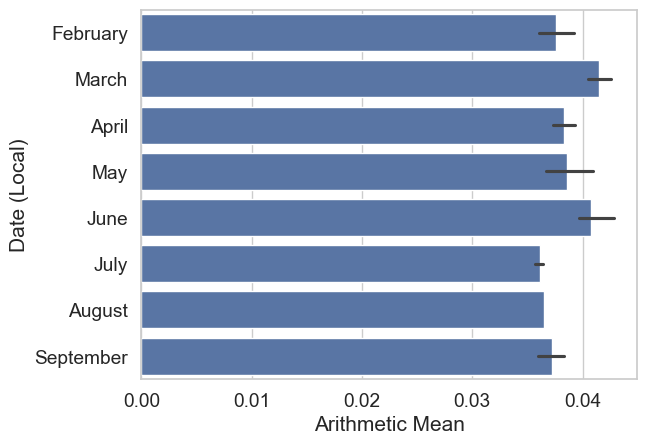

In [19]:
sns.barplot(result, x="Arithmetic Mean", y="Date (Local)")

In [20]:
filename = "38090658.csv"

In [21]:
df2 = pd.read_csv(filename)

In [22]:
df2.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


[Text(0.5, 0, 'years'), Text(0, 0.5, 'Average CO2 (ppm)')]

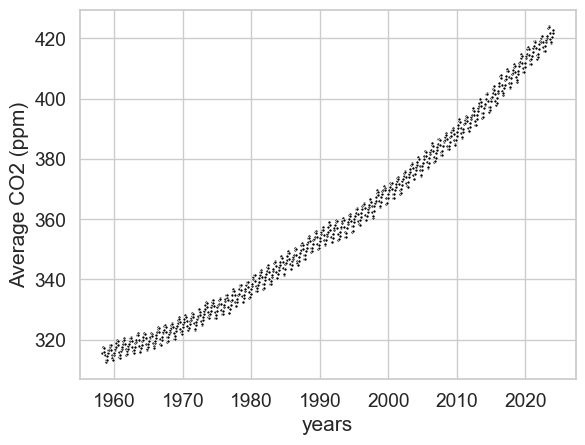

In [23]:
ax =sns.scatterplot(data=df2, x="decimal date", y="average", color='black', sizes = (500,500))
ax.collections[0].set_sizes([5]) 
ax.set(xlabel='years', ylabel='Average CO2 (ppm)')

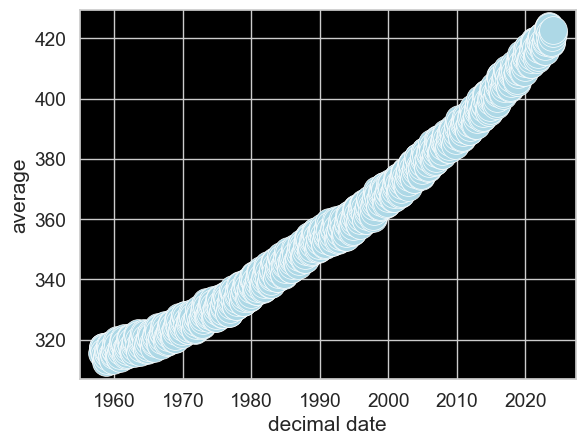

In [24]:

sns.set_style(rc = {'axes.facecolor': 'black'})
ax =sns.scatterplot(data=df2, x="decimal date", y="average", color='lightblue', sizes = (500,500))
ax.collections[0].set_sizes([400]) 